In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from sklearn.model_selection import train_test_split
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist


In [3]:
df = pd.read_csv('D:\VS Code Folders\CODSOFT\Movie Genre Classification\movies dataset\Genre Classification Dataset\\train_data.txt', sep=' ::: ', engine='python', header=None, names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
# df.head()

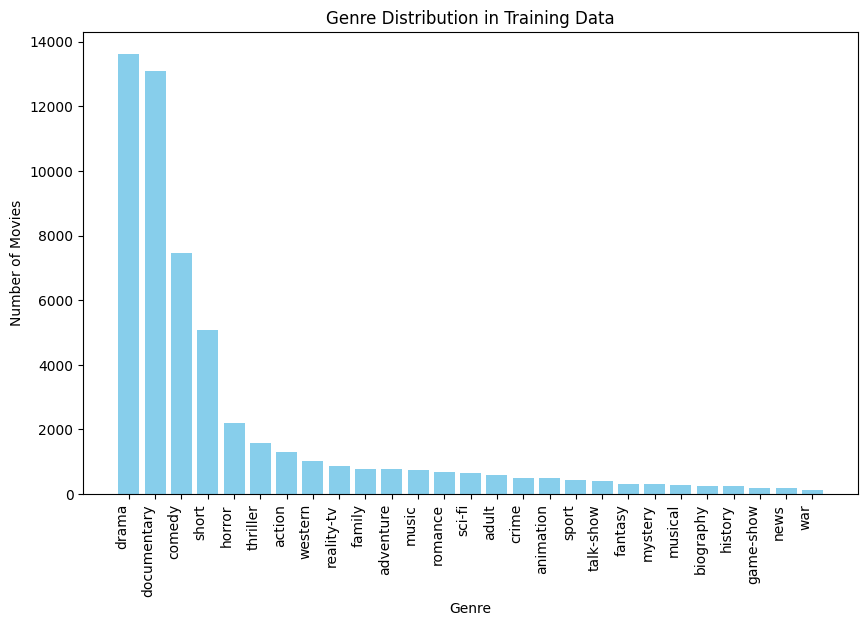

In [4]:
genre_counts = df['GENRE'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.index, genre_counts, color='skyblue')
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show()


In [24]:
df['GENRE'].value_counts()

GENRE
drama          13613
documentary    13096
comedy          7447
short           5073
horror          2204
thriller        1591
action          1315
western         1032
reality-tv       884
family           784
adventure        775
music            731
romance          672
sci-fi           647
adult            590
crime            505
animation        498
sport            432
talk-show        391
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Name: count, dtype: int64

In [6]:
dummies = pd.get_dummies(df['GENRE'])
dummies

,action,adult,adventure,animation,biography,comedy,crime,documentary,drama,family,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54210,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54211,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
54212,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
dummies.replace({True: 1, False: 0}, inplace= True)
dummies
df_new = pd.concat([df, dummies], axis = 'columns')
df_new.drop(['GENRE'], axis = 'columns')
df_new

,ID,TITLE,GENRE,DESCRIPTION,action,adult,adventure,animation,biography,comedy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
MAX_LEN = 200
NUM_WORDS = 25000

In [9]:
y = df['GENRE']

In [10]:
labels = []
for label in y:
    labels.append(label) 
print(labels[:5])
# labels = np.array(labels)
# labels.shape

['drama', 'thriller', 'adult', 'drama', 'drama']


In [11]:
X = df['DESCRIPTION']
X

0        Listening in to a conversation between his doc...
1        A brother and sister with a past incestuous re...
2        As the bus empties the students for their fiel...
3        To help their unemployed father make ends meet...
4        The film's title refers not only to the un-rec...
                               ...                        
54209    This short-lived NBC live sitcom centered on B...
54210    The NEXT Generation of EXPLOITATION. The siste...
54211    Ze bestaan echt, is a stand-up comedy about gr...
54212    Walter and Vivian live in the country and have...
54213    On Labor Day Weekend, 1935, the most intense h...
Name: DESCRIPTION, Length: 54214, dtype: object

In [12]:
def remove_stopwords(sentence):
    """
    Removes a list of stopwords
    
    Args:
        sentence (string): sentence to remove the stopwords from
    
    Returns:
        sentence (string): lowercase sentence without the stopwords
    """
    # List of stopwords
    stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
    
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence

sentences = []
for sentence in X:
    sentence = remove_stopwords(sentence)
    sentences.append(sentence)

print(len(sentences))

54214


In [13]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(sentences, labels, test_size=0.1, random_state=True, shuffle= True)

In [14]:
tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
# tokenizer.fit_on_texts(X_test)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)

padded_train_sentences = pad_sequences(train_sequences, padding = 'post', maxlen=MAX_LEN)
padded_validation_sentences = pad_sequences(validation_sequences, padding = 'post', maxlen= MAX_LEN)

In [15]:
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)

print(f"Vocabulary contains {VOCAB_SIZE} words\n")
print(padded_train_sentences.shape)
print(padded_validation_sentences.shape)


Vocabulary contains 130623 words

(48792, 200)
(5422, 200)


In [31]:
from sklearn.preprocessing import LabelEncoder

def tokenize_labels(all_labels, split_labels):
    """
    Tokenizes the labels
    
    Args:
        all_labels (list of string): labels to generate the word-index from
        split_labels (list of string): labels to tokenize
    
    Returns:
        label_seq_np (array of int): tokenized labels
    """
    
    # Use LabelEncoder to map labels to integers
    label_encoder = LabelEncoder()
    label_encoder.fit(all_labels)
    
    # Convert labels to integers
    label_seq = label_encoder.transform(split_labels)
    
    return label_seq


In [41]:
# print(train_labels.shape)
# print(validation_labels.shape)
# print(labels.shape)
# print(type(labels))
# print(type(train_labels))
label_encoder = LabelEncoder()
label_encoder.fit(labels)

train_label_seq = label_encoder.transform(train_labels)
val_label_seq = label_encoder.transform(validation_labels)

train_label_seq = train_label_seq.reshape(-1, 1)
val_label_seq = val_label_seq.reshape(-1, 1)

labels = np.array(labels)
unique_values = np.unique(labels)
print(len(unique_values))
print(f"First 5 labels of the training set should look like this:\n{max(train_label_seq)}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

27
First 5 labels of the training set should look like this:
[26]

First 5 labels of the validation set should look like this:
[[ 7]
 [21]
 [21]
 ...
 [21]
 [21]
 [ 7]]

Tokenized labels of the training set have shape: (48792, 1)

Tokenized labels of the validation set have shape: (5422, 1)



In [51]:
def create_model(num_words, embedding_dim, maxlen):
    model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(27, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy']) 

    return model

model = create_model(NUM_WORDS, 16, MAX_LEN)

history = model.fit(padded_train_sentences, train_label_seq, epochs=30, validation_data=(padded_validation_sentences, val_label_seq))


Epoch 1/30
1525/1525 [==============================] - 27s 16ms/step - loss: 2.2226 - accuracy: 0.3189 - val_loss: 1.8973 - val_accuracy: 0.4570
Epoch 2/30
1525/1525 [==============================] - 31s 20ms/step - loss: 1.7540 - accuracy: 0.4751 - val_loss: 1.7589 - val_accuracy: 0.4788
Epoch 3/30
1525/1525 [==============================] - 28s 19ms/step - loss: 1.6089 - accuracy: 0.5116 - val_loss: 1.7522 - val_accuracy: 0.4838
Epoch 4/30
1525/1525 [==============================] - 31s 20ms/step - loss: 1.5078 - accuracy: 0.5432 - val_loss: 1.7531 - val_accuracy: 0.4970
Epoch 5/30
1525/1525 [==============================] - 27s 18ms/step - loss: 1.3731 - accuracy: 0.5905 - val_loss: 1.7476 - val_accuracy: 0.5124
Epoch 6/30
1525/1525 [==============================] - 32s 21ms/step - loss: 1.2591 - accuracy: 0.6268 - val_loss: 1.8896 - val_accuracy: 0.5072
Epoch 7/30
1525/1525 [==============================] - 24s 16ms/step - loss: 1.1594 - accuracy: 0.6522 - val_loss: 1.9037 -

In [43]:
# Check the sequence lengths
print(padded_train_sentences.shape)
print(train_label_seq.shape)
print(padded_validation_sentences.shape)
print(val_label_seq.shape)


(48792, 200)
(48792, 1)
(5422, 200)
(5422, 1)


In [46]:
unique_labels = np.unique(train_label_seq)
print("Unique Labels:", unique_labels)

Unique Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [47]:
num_classes = len(np.unique(train_label_seq))  
print(num_classes)

27


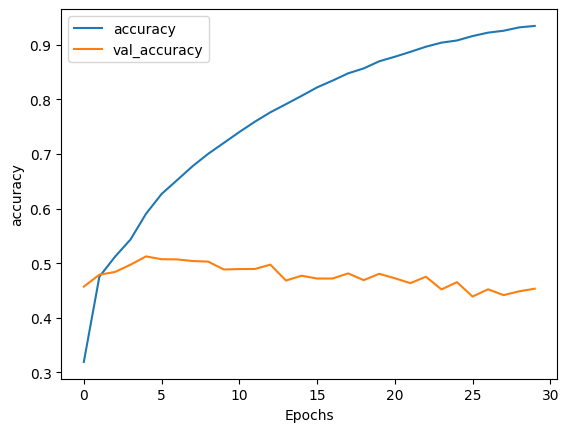

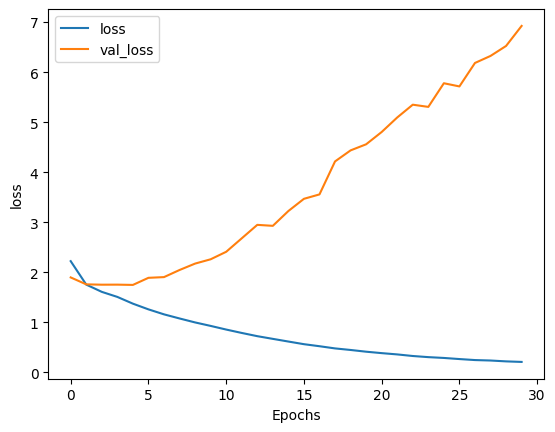

In [52]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")